In [1]:
# we want to add a PS on f140w
from tools import *
from get_res import *
from create_fits import *
from image_manipulation import create_mask
from input_data import init_kwrg_data,init_kwrg_psf


import numpy as np
from copy import copy 
import matplotlib.pyplot as plt

In [10]:
res_dir = "backup_results/pert_f140w/"
mkdir(res_dir)
setting  = get_setting_module("f140w",1)

f140w_data = init_kwrg_data(setting)
data_f140w = f140w_data["image_data"]
err_f140w  = f140w_data["noise_map"]
f140w_psf  = init_kwrg_psf(setting)
psf_f140w  = f140w_psf["kernel_point_source"]
psf_err_f140w = f140w_psf["psf_error_map"]

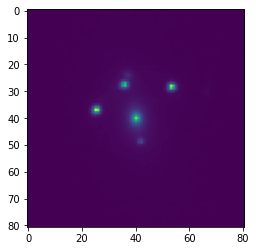

In [3]:
plt.imshow(data_f140w)

In [4]:

def get_bandmodel(setting):
    kwargs_model     = get_kwargs_model(setting)
    kwargs_data,mask = init_kwrg_data(setting,return_mask=True)
    kwargs_numerics  = init_kwrg_numerics(setting)
    kwargs_psf       = init_kwrg_psf(setting,saveplots=False)
    multi_band_list  = [[kwargs_data, kwargs_psf, kwargs_numerics]]
    image_likelihood_mask_list = [mask.tolist()]
    bandmodel = SingleBandMultiModel(multi_band_list, kwargs_model, likelihood_mask_list=image_likelihood_mask_list,band_index=0)
    return bandmodel

In [60]:
kw_model = get_kwargs_model("f140w")
del kw_model["lens_model_list"] 
del kw_model["lens_light_model_list"] 
del kw_model["source_light_model_list"] 
kw_model

{'z_lens': 0.407,
 'z_source': 2.737,
 'point_source_model_list': ['LENSED_POSITION'],
 'additional_images_list': [False],
 'fixed_magnification_list': [False]}

In [61]:
kwargs_data,mask = init_kwrg_data(setting,return_mask=True)
kwargs_numerics  = init_kwrg_numerics(setting)
kwargs_psf       = init_kwrg_psf(setting,saveplots=False)
multi_band_list  = [[kwargs_data, kwargs_psf, kwargs_numerics]]
image_likelihood_mask_list = [mask.tolist()]
bandmodel = SingleBandMultiModel(multi_band_list, kw_model, likelihood_mask_list=image_likelihood_mask_list,band_index=0)


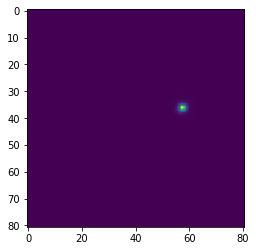

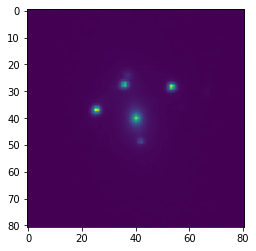

In [62]:
from conversion import conv_xy_to_radec
ra_prt,dec_prt = np.reshape(conv_xy_to_radec("f160w",61.969871,65.053113),2).tolist()
# position of the "point source" pert in F160w_abs_residual.fits in sim_f160w/backup_results/mod_f160w
kwres_ps = {'kwargs_ps': [{'ra_image': [ ra_prt],
   'dec_image': [ dec_prt],
   'point_amp': [3.0010542+.35]}]}#50.5 before
# point amp so that aperture amp is ~ the same as the one in F160w_abs_residual.fits in sim_f160w/backup_results/mod_f160w
ps_pert= ps_light("none",kwres=kwres_ps,bandmodel=bandmodel,unconvolved=False)
plt.imshow(ps_pert)
plt.show()
pert_f140w = (data_f140w+ps_pert)
plt.imshow(pert_f140w)
plt.show()



In [56]:
setting  = get_setting_module(setting,1)
data_pth = setting.data_path+setting.image_name
fits_with_copied_hdr(ps_pert,fits_parent_path=data_pth,data_object="Point Source Perturber f140w image",
                    fits_res_namepath=res_dir+"ps_pert_f140w.fits")

saving file backup_results/pert_f140w/ps_pert_f140w.fits


0

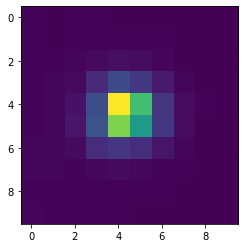

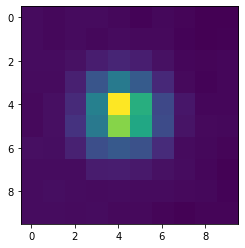

72.82835


In [57]:
#approx coord of image A
plt.imshow(data_f140w[24:34,49:59])
plt.show()
plt.imshow(err_f140w[24:34,49:59])
plt.show()
scale_err = (np.max(data_f140w[24:34,49:59])/np.max(err_f140w[24:34,49:59]))
print(scale_err)

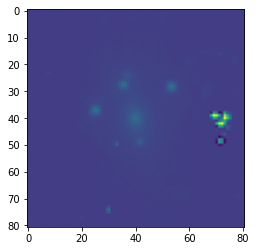

In [58]:
err_pert_ps = ps_pert/scale_err

pert_f140w_err = err_f140w + err_pert_ps
plt.imshow(np.log10(pert_f140w_err))
plt.show()

In [59]:

data_pth = setting.data_path+setting.image_name
err_pth = setting.data_path+setting.err_name
fits_with_copied_hdr(pert_f140w,fits_parent_path=data_pth,data_object="Perturber f140w image",
                    fits_res_namepath=res_dir+"pert_f140w_1.fits")
fits_with_copied_hdr(pert_f140w_err,fits_parent_path=err_pth,data_object="Perturber f140w image: Error frame",
                    fits_res_namepath=res_dir+"e.pert_f140w_1.fits")


saving file backup_results/pert_f140w/pert_f140w_1.fits
saving file backup_results/pert_f140w/e.pert_f140w_1.fits


0